In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
data= pd.read_csv('fictional_character_battles_complex.csv')

In [4]:
data.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [5]:
data.tail()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
2346,Superman,DC Comics,9,8,5,Super Strength,Kryptonite,0
2347,Superman,DC Comics,2,5,8,Super Strength,Magic,1
2348,Flash,DC Comics,5,3,3,Telekinesis,Wooden Stake,0
2349,Batman,DC Comics,5,10,6,Flight,Wooden Stake,1
2350,Spider-Man,Marvel,8,1,5,Super Strength,Magic,1


In [6]:
data.shape

(2351, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Universe          2351 non-null   object
 2   Strength          2351 non-null   int64 
 3   Speed             2351 non-null   int64 
 4   Intelligence      2351 non-null   int64 
 5   SpecialAbilities  2351 non-null   object
 6   Weaknesses        2351 non-null   object
 7   BattleOutcome     2351 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 147.1+ KB


In [8]:
data.isnull().sum(axis=0)

Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64

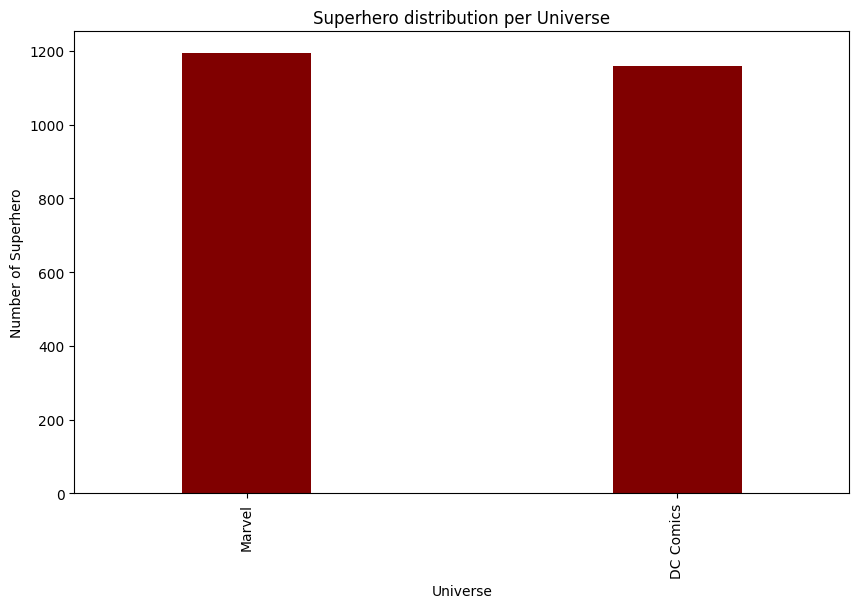

In [9]:
count=data['Universe'].value_counts()
plt.figure(figsize=(10, 6))
count.plot(kind='bar',color='maroon', width=0.3)
plt.title('Superhero distribution per Universe')
plt.xlabel('Universe')
plt.ylabel('Number of Superhero')
plt.show()

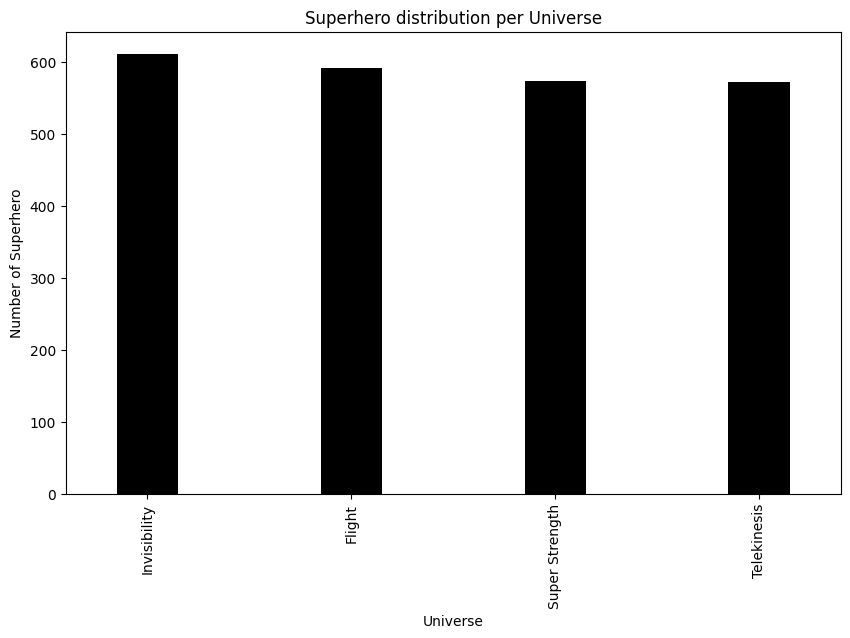

In [10]:
count_sa=data['SpecialAbilities'].value_counts()
plt.figure(figsize=(10, 6))
count_sa.plot(kind='bar',color='Black', width=0.3)
plt.title('Superhero distribution per Universe')
plt.xlabel('Universe')
plt.ylabel('Number of Superhero')
plt.show()

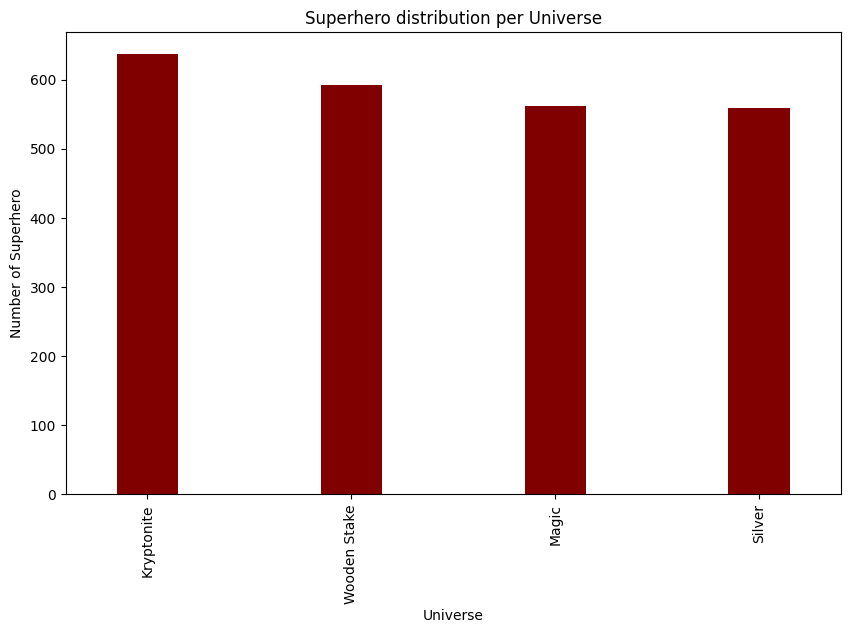

In [11]:
count_wk=data['Weaknesses'].value_counts()
plt.figure(figsize=(10, 6))
count_wk.plot(kind='bar',color='maroon', width=0.3)
plt.title('Superhero distribution per Universe')
plt.xlabel('Universe')
plt.ylabel('Number of Superhero')
plt.show()

In [12]:
# Encode categorical variables
le_character = LabelEncoder()
le_universe = LabelEncoder()
le_special_abilities = LabelEncoder()
le_weaknesses = LabelEncoder()

data['Character'] = le_character.fit_transform(data['Character'])
data['Universe'] = le_universe.fit_transform(data['Universe'])
data['SpecialAbilities'] = le_special_abilities.fit_transform(data['SpecialAbilities'])
data['Weaknesses'] = le_weaknesses.fit_transform(data['Weaknesses'])

In [13]:
# Generating all possible battles between Marvel and DC characters
marvel_characters = data[data['Universe'] == le_universe.transform(['Marvel'])[0]]
dc_characters = data[data['Universe'] == le_universe.transform(['DC Comics'])[0]]

battles = []
for marvel, dc in itertools.product(marvel_characters.iterrows(), dc_characters.iterrows()):
    index_marvel, row_marvel = marvel
    index_dc, row_dc = dc
    battle = {
        'Character1': row_marvel['Character'],
        'Character2': row_dc['Character'],
        'Strength1': row_marvel['Strength'],
        'Strength2': row_dc['Strength'],
        'Speed1': row_marvel['Speed'],
        'Speed2': row_dc['Speed'],
        'Intelligence1': row_marvel['Intelligence'],
        'Intelligence2': row_dc['Intelligence'],
        'SpecialAbilities1': row_marvel['SpecialAbilities'],
        'SpecialAbilities2': row_dc['SpecialAbilities'],
        'Weaknesses1': row_marvel['Weaknesses'],
        'Weaknesses2': row_dc['Weaknesses'],
        'BattleOutcome': row_marvel['BattleOutcome']  # Assume BattleOutcome from original data for now
    }
    battles.append(battle)

battles_df = pd.DataFrame(battles)

In [14]:
# Split the data into training and test sets
X = battles_df.drop('BattleOutcome', axis=1)
y = battles_df['BattleOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9910097394489303


In [15]:
def predict_winner(character1, character2):
    char1_encoded = le_character.transform([character1])[0]
    char2_encoded = le_character.transform([character2])[0]
    
    char1_data = data[data['Character'] == char1_encoded].iloc[0]
    char2_data = data[data['Character'] == char2_encoded].iloc[0]
    
    battle_features = {
        'Character1': char1_encoded,
        'Character2': char2_encoded,
        'Strength1': char1_data['Strength'],
        'Strength2': char2_data['Strength'],
        'Speed1': char1_data['Speed'],
        'Speed2': char2_data['Speed'],
        'Intelligence1': char1_data['Intelligence'],
        'Intelligence2': char2_data['Intelligence'],
        'SpecialAbilities1': char1_data['SpecialAbilities'],
        'SpecialAbilities2': char2_data['SpecialAbilities'],
        'Weaknesses1': char1_data['Weaknesses'],
        'Weaknesses2': char2_data['Weaknesses']
    }
    
    battle_df = pd.DataFrame([battle_features])
    prediction = model.predict(battle_df)[0]
    
    if prediction == 1:
        winner = character1
    else:
        winner = character2
        
    return winner

In [16]:
# Sample prediction
character1 = 'Iron Man'
character2 = 'Flash'
winner = predict_winner(character1, character2)
print(f'The predicted winner between {character1} and {character2} is {winner}.')

The predicted winner between Iron Man and Flash is Flash.


In [17]:
# Sample prediction
character3 = 'Thor'
character4 = 'Batman'
winner1 = predict_winner(character3, character4)
print(f'The predicted winner between {character3} and {character4} is {winner1}.')

The predicted winner between Thor and Batman is Thor.
